# Jan 13, 20 Keras tf1 IMDB binary classification
* Name: Jikhan Jeong
* Ref: https://github.com/fchollet/deep-learning-with-python-notebooks 
* https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [0]:
 %tensorflow_version 1.x # for using keras rather than tf.2
from keras import layers
layer = layers.Dense(32, input_shape=(784,))

In [0]:
from keras import models
from keras import layers

# 1. Sequential class

In [0]:
# Demo
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32, activation='relu')
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# Demo
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='mse',
              metrics=['accuracy'])

In [0]:
# Demo
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

# 2. Functional API

In [0]:
# Demo
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(input=input_tensor, output=output_tensor)

# Example: IMDB reviews classification
* binary-class
* multi-class

In [0]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#  num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data.

17465344/17464789 [==============================] - 1s 0us/step


In [14]:
# train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words)
# numpy data
print(type(train_data), train_data[0])
print(len(train_data[0]))

<class 'numpy.ndarray'> [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [7]:
train_labels[0]

1

In [8]:
# Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

# Preparing the data

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building our network

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#  a simple stack of fully-connected (Dense) layers with relu activations: Dense(16, activation='relu')
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Validating our approach

In [19]:
x_train.shape, y_train.shape

((25000, 10000), (25000,))

In [20]:
x_test.shape, y_test.shape

((25000, 10000), (25000,))

* spliting training set = validation, training_set

In [0]:
x_val = x_train[:10000] # validation feature
y_val = y_train[:10000] # validation label

partial_x_train = x_train[10000:] # train_subset feature
partial_y_train = y_train[10000:] # train_subset label 

In [25]:
print(partial_x_train.shape)
15000/512

(15000, 10000)


29.296875

In [22]:

history = model.fit(partial_x_train, # train_subset
                    partial_y_train,
                    epochs=20,       # epochs
                    batch_size=512,  # batch_size
                    validation_data=(x_val, y_val)) # validation set




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 10s 689us/step - loss: 0.4942 - acc: 0.7863 - val_loss: 0.3721 - val_acc: 0.8588
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2852 - acc: 0.9072 - val_loss: 0.2913 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2111 - acc: 0.9293 - val_loss: 0.2814 - val_acc: 0.8859
Epoch 4/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1684 - acc: 0.9447 - val_loss: 0.2776 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1361 - acc: 0.9559 - val_loss: 0.2840 - val_acc: 0.8888
Epoch 6/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1151 - acc: 0.9657 - val_loss: 0.3254 - val_acc: 0.8765
Epoch 7/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.0944 - acc: 0.9719 - val_loss: 0.3216

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

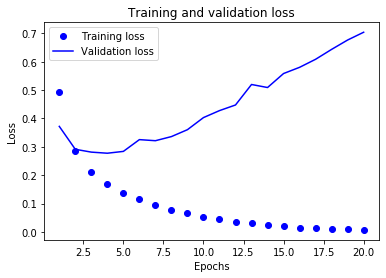

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

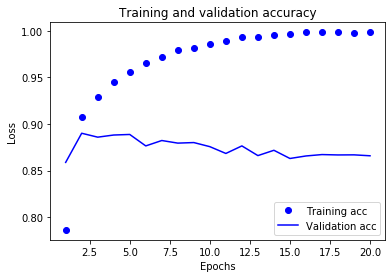

In [27]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Analysis
* validation acc is decrease after 2 epoch so 2 epoch is the best hyperparameter

# Test Set

In [42]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model1.evaluate(x_test, y_test) # result =[loss, correct]

Epoch 1/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.4503 - acc: 0.8237
Epoch 2/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.2583 - acc: 0.9114
Epoch 3/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.1979 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


In [40]:
a = 0.8182+ 0.9132+ 0.9292+0.9408
a/4

0.90035

In [44]:
print(model1.metrics_names)

['loss', 'acc']


In [45]:
results
# 0.87652 correct

[0.33258832796096804, 0.87164]

In [46]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'acc'])

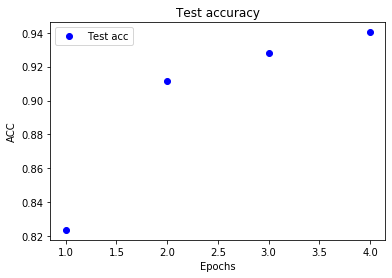

In [47]:
plt.clf()   # clear figure
acc_values = history_dict1['acc']
epo = [1,2,3,4]
plt.plot(epo, acc_values, 'bo', label='Test acc')
plt.title('Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

#  Why Training loss and acc and evaluation acc are different?

Why is the training loss much higher than the testing loss?
A Keras model has two modes: training and testing. Regularization mechanisms, such as Dropout and L1/L2 weight regularization, are turned off at testing time.

Besides, the training loss is the average of the losses over each batch of training data. Because your model is changing over time, the loss over the first batches of an epoch is generally higher than over the last batches. On the other hand, the testing loss for an epoch is computed using the model as it is at the end of the epoch, resulting in a lower loss.

* Ref: https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss

* Ref: https://stackoverflow.com/questions/51299836/what-values-are-returned-from-model-evaluate-in-keras/51303340

# Using a trained network to generate predictions on new data

In [48]:
model1.predict(x_test)

array([[0.10885853],
       [0.99836767],
       [0.5266063 ],
       ...,
       [0.06359467],
       [0.02754697],
       [0.46243757]], dtype=float32)